# QuTiP lecture: Evolution and quantum statistics of a quantum parameter amplifier

Author: J. R. Johansson (robert@riken.jp), http://dml.riken.jp/~rob/

The latest version of this [IPython notebook](http://ipython.org/ipython-doc/dev/interactive/htmlnotebook.html) lecture is available at [http://github.com/jrjohansson/qutip-lectures](http://github.com/jrjohansson/qutip-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.com](http://jrjohansson.github.com).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [2]:
from qutip import *

Parameters
----------

In [3]:
chi = 0.2
N1 = 75
N2 = 75

Operators and Hamiltonian
-------------------------

In [4]:
a  = tensor(destroy(N1), qeye(N2))
na = tensor(num(N1),     qeye(N2)) 
b  = tensor(qeye(N1),    destroy(N2))
nb = tensor(qeye(N1),    num(N2)) 

In [5]:
H = - chi * (a * b + a.dag() * b.dag())

In [6]:
# start in the ground (vacuum) state
psi0 = tensor(basis(N1,0), basis(N2,0))

Evolution
---------

In [7]:
tlist = np.linspace(0, 10, 100)

In [8]:
c_ops = []

In [9]:
e_ops = []

In [10]:
output = mesolve(H, psi0, tlist, c_ops, e_ops)
output

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0

## Expectation values and standard deviations


In [11]:
na_e = np.zeros(shape(tlist))
na_s = np.zeros(shape(tlist))
nb_e = np.zeros(shape(tlist))
nb_s = np.zeros(shape(tlist))

for idx, psi in enumerate(output.states):
    na_e[idx] = expect(na, psi)
    na_s[idx] = expect(na*na, psi)
    nb_e[idx] = expect(nb, psi)
    nb_s[idx] = expect(nb*nb, psi)

# substract the average squared to obtain variances
na_s = na_s - na_e ** 2
nb_s = nb_s - nb_e ** 2

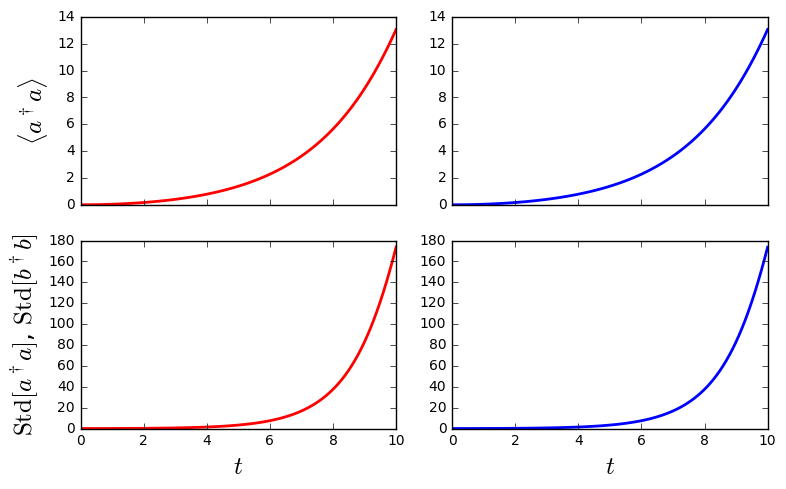

In [14]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(8,5))

line1 = axes[0,0].plot(tlist, na_e, 'r', linewidth=2)
axes[0,0].set_ylabel(r'$\langle a^\dagger a \rangle$', fontsize=18)

line2 = axes[0,1].plot(tlist, nb_e, 'b', linewidth=2)

line3 = axes[1,0].plot(tlist, na_s, 'r', linewidth=2)
axes[1,0].set_xlabel('$t$', fontsize=18)
axes[1,0].set_ylabel(r'$\mathrm{Std}[a^\dagger a]$, $\mathrm{Std}[b^\dagger b]$', fontsize=18)

line4 = axes[1,1].plot(tlist, nb_s, 'b', linewidth=2)
axes[1,1].set_xlabel('$t$', fontsize=18)

fig.tight_layout()


Wigner functions
----------------

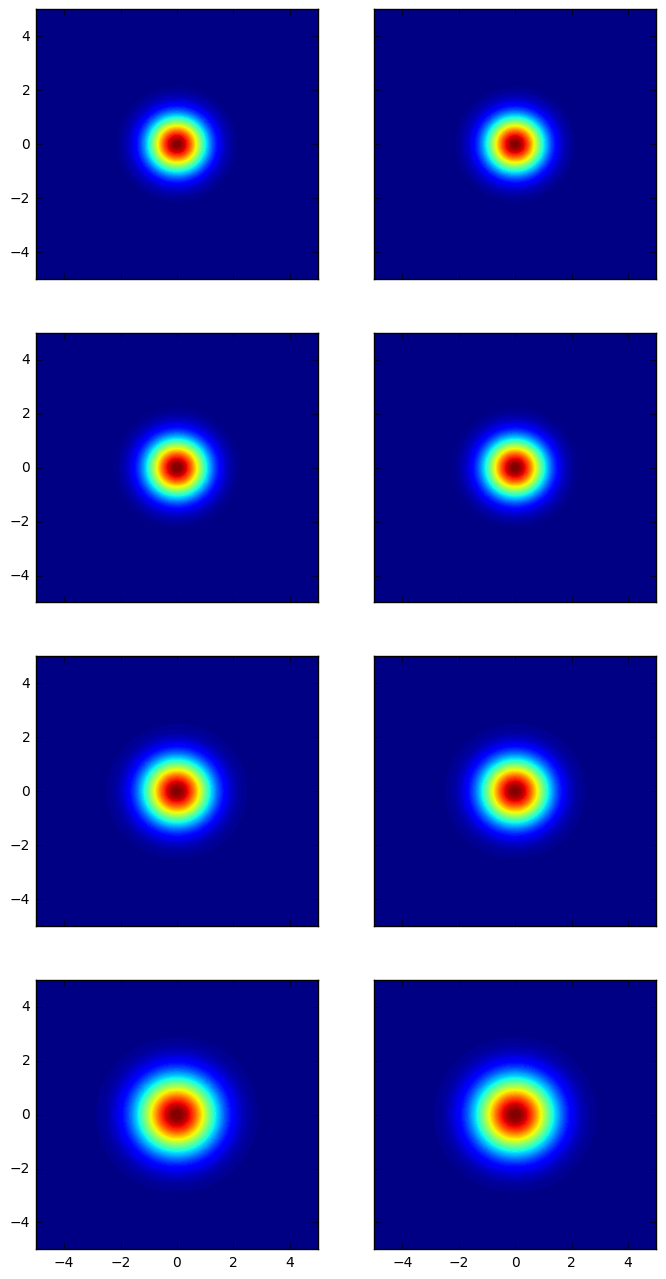

In [15]:
# pick an arbitrary time and calculate the wigner functions for each mode
xvec = np.linspace(-5,5,200)
t_idx_vec = [0, 10, 20, 30]

fig, axes = plt.subplots(len(t_idx_vec), 2, sharex=True, sharey=True, figsize=(8,4*len(t_idx_vec)))

for idx, t_idx in enumerate(t_idx_vec):
    psi_a = ptrace(output.states[t_idx], 0)
    psi_b = ptrace(output.states[t_idx], 1)
    W_a = wigner(psi_a, xvec, xvec)
    W_b = wigner(psi_b, xvec, xvec)
    
    cont1 = axes[idx,0].contourf(xvec, xvec, W_a, 100)
    cont2 = axes[idx,1].contourf(xvec, xvec, W_b, 100)


Fock-state distribution
-----------------------


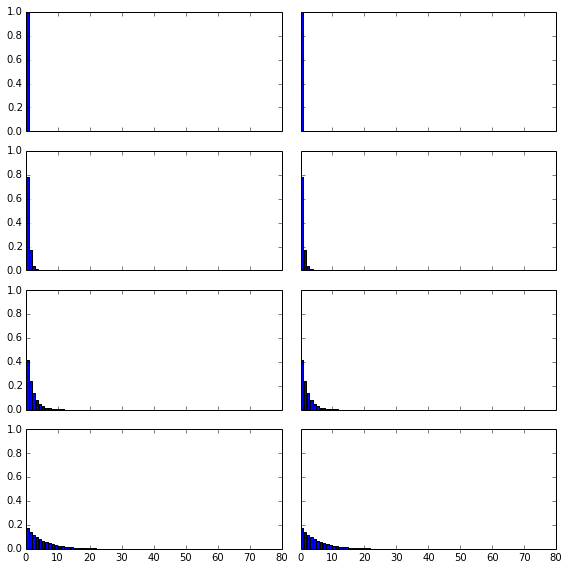

In [15]:
# pick arbitrary times and plot the photon distributions at those times
#t_idx_vec = [0, 10, 20, 30]
t_idx_vec = range(0,len(tlist),25) 

fig, axes = plt.subplots(len(t_idx_vec), 2, sharex=True, sharey=True, figsize=(8,2*len(t_idx_vec)))

for idx, t_idx in enumerate(t_idx_vec):
    psi_a = ptrace(output.states[t_idx], 0)
    psi_b = ptrace(output.states[t_idx], 1)
    
    cont1 = axes[idx,0].bar(range(0, N1), real(psi_a.diag()))
    cont2 = axes[idx,1].bar(range(0, N2), real(psi_b.diag()))
    
fig.tight_layout()

## Nonclassical correlations

In [18]:
# second-order photon correlations
g2_1  = np.zeros(shape(tlist))
g2_2  = np.zeros(shape(tlist))
g2_12 = zeros(shape(tlist))

ad_ad_a_a = a.dag() * a.dag() * a * a
bd_bd_b_b = b.dag() * b.dag() * b * b
ad_a_bd_b = a.dag() * a * b.dag() * b

cs_rhs = zeros(shape(tlist))
cs_lhs = zeros(shape(tlist))

for idx, psi in enumerate(output.states):
    # g2 correlations
    g2_1[idx]  = expect(ad_ad_a_a, psi)
    g2_2[idx]  = expect(bd_bd_b_b, psi)
    g2_12[idx] = expect(ad_a_bd_b, psi)
    
    # cauchy-schwarz 
    cs_lhs[idx] = expect(ad_a_bd_b, psi)
    cs_rhs[idx] = expect(ad_ad_a_a, psi)
    
# normalize the correlation functions
g2_1  = g2_1  / (na_e ** 2)
g2_2  = g2_2  / (nb_e ** 2)
g2_12 = g2_12 / (na_e * nb_e)

NameError: name 'zeros' is not defined

### Second-order coherence functions: Cauchy-Schwarz inequality

Walls and Milburn, page 78: Classical states satisfy

$[g_{12}^{(2)}]^2 \leq g_{1}^{(2)}g_{2}^{(2)}$

(variant of the Cauchy-Schwarz inequality)

NameError: name 'g2_1' is not defined

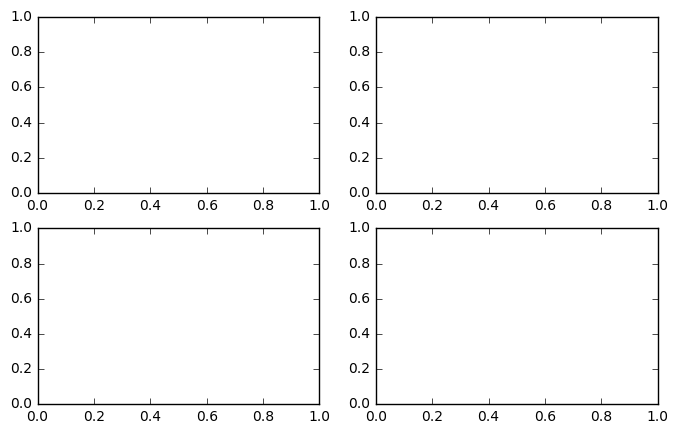

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(8,5))

line1 = axes[0,0].plot(tlist, g2_1, 'r', linewidth=2)
axes[0,0].set_xlabel("$t$", fontsize=18)
axes[0,0].set_ylabel(r'$g_1^{(2)}(t)$', fontsize=18)
axes[0,0].set_ylim(0,3)

line2 = axes[0,1].plot(tlist, g2_2, 'b', linewidth=2)
axes[0,1].set_xlabel("$t$", fontsize=18)
axes[0,1].set_ylabel(r'$g_2^{(2)}(t)$', fontsize=18)
axes[0,1].set_ylim(0,3)

line3 = axes[1,0].plot(tlist[10:], g2_12[10:], 'b', linewidth=2)
axes[1,0].set_xlabel("$t$", fontsize=18)
axes[1,0].set_ylabel(r'$g_{12}^{(2)}(t)$', fontsize=18)


line4 = axes[1,1].plot(tlist[20:], abs(g2_12[20:])**2, 'b', linewidth=2)
line5 = axes[1,1].plot(tlist, g2_1 * g2_2, 'r', linewidth=2)
axes[1,1].set_xlabel("$t$", fontsize=18)
axes[1,1].set_ylabel(r'$|g_{12}^{(2)}(t)|^2$', fontsize=18)

fig.tight_layout()

Clearly the two-mode squeezed state from the parameteric amplifier does not satisfy this inequality, and is therefore not classical.

Cauchy-Schwarz inequality
-------------------------

Walls and Milburn, page 78: the Cauchy-Schwarz inequality for symmetric modes

$\langle a^\dagger a b^\dagger b\rangle \leq \langle(a^\dagger)^2a^2\rangle$


-c:7: RuntimeWarning: invalid value encountered in true_divide


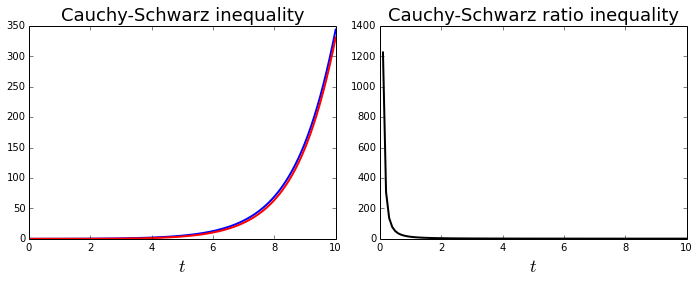

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

line1 = axes[0].plot(tlist, cs_lhs, 'b', tlist, cs_rhs, 'r', linewidth=2)
axes[0].set_xlabel("$t$", fontsize=18)
axes[0].set_title(r'Cauchy-Schwarz inequality', fontsize=18)

line1 = axes[1].plot(tlist, cs_lhs / (cs_rhs), 'k', linewidth=2)
axes[1].set_xlabel("$t$", fontsize=18)
axes[1].set_title(r'Cauchy-Schwarz ratio inequality', fontsize=18)

fig.tight_layout()

Two-mode squeezing correlations
-------------------------------

The two-mode squeezing can be characterized by the parameter $\sigma_2$ defined as

$\sigma_2 = \frac{2\sqrt{\omega_a\omega_b}\left[\langle a b\rangle e^{i2\theta_\Sigma} + \langle a^\dagger b^\dagger\rangle e^{-i2\theta_\Sigma}\right]}{\omega_a\langle a^\dagger a + a a^\dagger \rangle +\omega_b\langle b^\dagger b + b b^\dagger \rangle}$



In [19]:
# pre-compute operators outside the loop
op_a_b = a * b
op_ad_bd = a.dag() * b.dag()
op_ad_a_p_a_ad  = a.dag() * a + a * a.dag()
op_bd_b_p_b_bd  = b.dag() * b + b * b.dag()

e_a_b   = np.zeros(shape(tlist), dtype=complex)
e_ad_bd = np.zeros(shape(tlist), dtype=complex)
e_ad_a_p_a_ad = np.zeros(shape(tlist), dtype=complex)
e_bd_b_p_b_bd = np.zeros(shape(tlist), dtype=complex)

for idx, psi in enumerate(output.states):
    
    e_a_b[idx]         = expect(op_a_b, psi)
    e_ad_bd[idx]       = expect(op_ad_bd, psi)
    e_ad_a_p_a_ad[idx] = expect(op_ad_a_p_a_ad, psi)
    e_bd_b_p_b_bd[idx] = expect(op_bd_b_p_b_bd, psi)
    
# calculate the sigma_2
theta = 3*pi/4
w_a = w_b = 1
sigma2 = 2 * sqrt(w_a * w_b) * (e_a_b * exp(2j * theta) + e_ad_bd * exp(-2j * theta)) / (w_a * e_ad_a_p_a_ad + w_b * e_bd_b_p_b_bd)

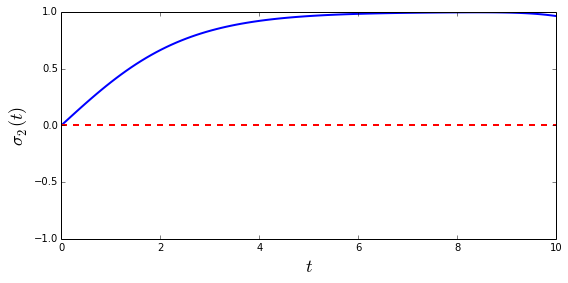

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(8,4))

line1 = axes.plot(tlist, real(sigma2), 'b', tlist, imag(sigma2), 'r--', linewidth=2)
axes.set_xlabel("$t$", fontsize=18)
axes.set_ylabel(r'$\sigma_2(t)$', fontsize=18)
axes.set_ylim(-1, 1)
fig.tight_layout()

Quantum-classical indicator $\langle:f^\dagger f:\rangle$
---------------------------------------------------------

Using $\langle:f^\dagger f:\rangle$ we can again show that the output of the parametric amplifier is nonclassical. If we choose

$f_\theta = e^{i\theta}b_- + e^{-i\theta}b_-^\dagger + ie^{i\theta}b_+ -i e^{-i\theta}b_+^\dagger$

we get

$F_\theta = \langle:f_\theta^\dagger f_\theta:\rangle = 2\langle a^\dagger a\rangle + 2\langle b^\dagger b\rangle + 2i\left(e^{2i\theta} \langle a b\rangle - e^{-2i\theta} \langle a^\dagger b^\dagger\rangle \right)$

In [21]:
# pre-compute operators outside the loop
op_ad_a  = a.dag() * a
op_bd_b  = b.dag() * b
op_a_b   = a * b
op_ad_bd = a.dag() * b.dag()

e_ad_a  = np.zeros(shape(tlist), dtype=complex)
e_bd_b  = np.zeros(shape(tlist), dtype=complex)
e_a_b   = np.zeros(shape(tlist), dtype=complex)
e_ad_bd = np.zeros(shape(tlist), dtype=complex)

for idx, psi in enumerate(output.states):
    
    e_ad_a[idx]  = expect(op_ad_a, psi)
    e_bd_b[idx]  = expect(op_bd_b, psi)
    e_a_b[idx]   = expect(op_a_b, psi)
    e_ad_bd[idx] = expect(op_ad_bd, psi)
    
# calculate the sigma_2, function of the angle parameter theta
def F_theta(theta):
    return 2 * e_ad_a + 2 * e_bd_b + 2j * (exp(2j * theta) * e_a_b - exp(-2j * theta) * e_ad_bd)

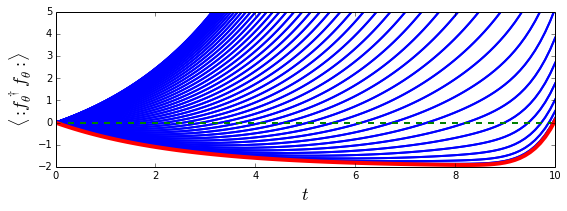

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(8,3))

for theta in np.linspace(0.0, 2*pi, 100):
    line1 = axes.plot(tlist, real(F_theta(theta)), 'b', tlist, imag(F_theta(theta)), 'g--', linewidth=2)

line = axes.plot(tlist, real(F_theta(0)), 'r', linewidth=4)
    
axes.set_xlabel("$t$", fontsize=18)
axes.set_ylabel(r'$\langle:f_\theta^\dagger f_\theta:\rangle$', fontsize=18)
axes.set_ylim(-2, 5)
fig.tight_layout()

Entanglement: logarithmic negativity
------------------------------------

#### Wigner covariance matrix:

In order to evaluate the logarithmic negativity we first need to construct the Wigner covariance matrix:

$V_{ij} = \frac{1}{2}\langle R_iR_j+R_jR_i \rangle$

where 

$R^T = (q_1, p_1, q_2, p_2) = (q_a, p_a, q_b, p_b)$

is a vector with the quadratures for the two modes $a$ and $b$:

$q_a = e^{i\theta_a}a + e^{-i\theta_a}a^\dagger$ 

$p_a = -i(e^{i\theta_a}a - e^{-i\theta_a}a^\dagger)$

and likewise for mode $b$.


In [27]:
R_op = correlation_matrix_quadrature(a, b)

In [40]:
def plot_covariance_matrix(V, ax):
    """
    Plot a matrix-histogram representation of the supplied Wigner covariance matrix.
    """
    num_elem = 16
    xpos,ypos = meshgrid(range(4),range(4))
    xpos = xpos.T.flatten()-0.5 
    ypos = ypos.T.flatten()-0.5 
    zpos = zeros(num_elem)   
    dx = 0.75 * np.ones(num_elem) 
    dy = dx.copy()           
    dz = V.flatten()

    nrm = mpl.colors.Normalize(-0.5,0.5) 
    colors = cm.jet(nrm((np.sign(dz)*abs(dz)**0.75))) 
    
    ax.view_init(azim=-40,elev=60)
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors)
    ax.axes.w_xaxis.set_major_locator(plt.IndexLocator(1,-0.5))
    ax.axes.w_yaxis.set_major_locator(plt.IndexLocator(1,-0.5))
    ax.axes.w_xaxis.set_ticklabels(("$q_-$", "$p_-$", "$q_+$", "$p_+$"), fontsize=20)
    ax.axes.w_yaxis.set_ticklabels(("$q_-$", "$p_-$", "$q_+$", "$p_+$"), fontsize=20)

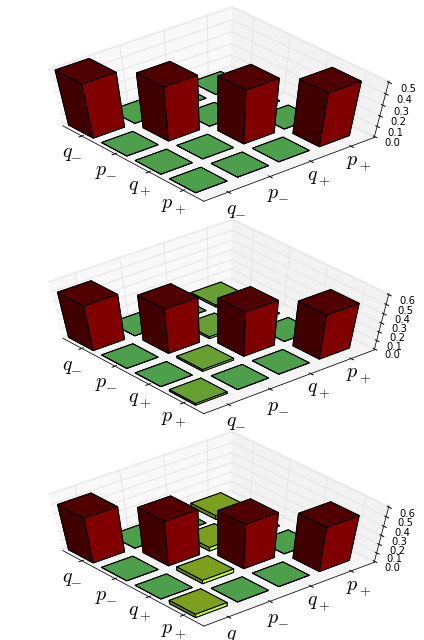

In [41]:
# pick arbitrary times and plot the photon distributions at those times
t_idx_vec = [0, 20, 40]

fig, axes = plt.subplots(len(t_idx_vec), 1, subplot_kw={'projection':'3d'}, figsize=(6,3*len(t_idx_vec)))

for idx, t_idx in enumerate(t_idx_vec):
    
    # calculate the wigner covariance matrix
    V = wigner_covariance_matrix(R=R_op, rho=output.states[idx])

    plot_covariance_matrix(V, axes[idx])
    
fig.tight_layout()

/usr/local/lib/python3.4/dist-packages/qutip/continuous_variables.py:287: RuntimeWarning: invalid value encountered in sqrt
  nu_ = sigma / 2 - np.sqrt(sigma ** 2 - 4 * np.linalg.det(V)) / 2


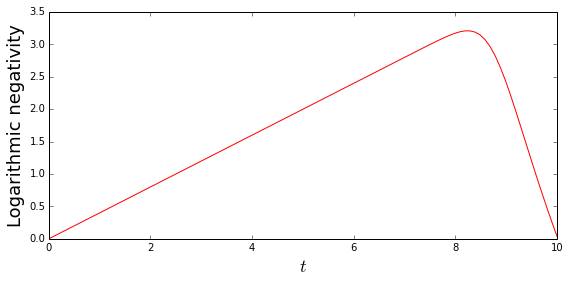

In [45]:
"""
Calculate the wigner covariance matrix logarithmic negativity for each time step
"""
logneg = np.zeros(shape(tlist))

for idx, t_idx in enumerate(tlist):
    
    V = wigner_covariance_matrix(R=R_op, rho=output.states[idx])
    
    logneg[idx] = logarithmic_negativity(V)
    
fig, axes = plt.subplots(1, 1, figsize=(8,4))
axes.plot(tlist, logneg, 'r')
axes.set_xlabel("$t$", fontsize=18)
axes.set_ylabel("Logarithmic negativity", fontsize=18)
fig.tight_layout()

### Software versions:

In [46]:
from qutip.ipynbtools import version_table

version_table()